In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [474]:
!pip install seaborn

In [3]:
df = pd.read_csv('final.csv', index_col=0) # open final csv file of clean webscraped data

In [4]:
df.shape

(470, 19)

In [4]:
df[df.duplicated()] # check for duplicated entries

,name,blend_single,classification,price,weight,weight in g,weight in oz,flavornotes,descriptor,roaster,location,roastlevel,roasternotes,process,sub region,harvest time,elevation,producer,varietal
140,Brazil Matas de Minas,Single Origins,Fruity & Crisp,17.00,12,340.194277,12.0,"Packed with bold notes of Ripe Fruit, Citrus a...","A farm-to-cup favorite, this is the real (sust...",Temple,"Sacramento, CA",Light-Medium Roast,One of our sustainability strategies every yea...,Process Pulped Natural,Sub Region Minas Gerais,NaN,Elevation 1200 - 1300,Producer Mixed,Varietal Mixed
141,Three Pillars,Blends,Sweet & Smooth,16.50,12,340.194277,12.0,A traditional base with hints of Brown Sugar a...,"A blend of three favorite varieties, this cup ...",Temple,"Sacramento, CA",Medium-Dark Roast,Our House Blend is crafted to please the coffe...,Process Pulped Natural,Sub Region Minas Gerais Nueva Segovia Central ...,NaN,Elevation 1200,Producer Mixed Henry Marin Alberto Guardia,Varietal Bourbon Catuai
142,"Batak, Sumatra",Single Origins,Bittersweet & Heavy,19.00,12,340.194277,12.0,none,Rustic cherry and herbal flavors with a strong...,Highwire,"Oakland, CA",Dark Roast,"Classic Sumatra character, this Rustic Charmer...",Process Washed Wet-hulled,NaN,NaN,NaN,NaN,Varietal Arabica
201,FTO Decaf Espresso,Blends,Syrupy & Smooth,15.95,12,340.194277,12.0,none,"A blend of the best from Indonesia, Africa, Ce...",Klatch,"Rancho Cucamonga, CA",Medium-Dark Roast,FTO Klatch House is a remarkable blend of Indo...,Process Washed,NaN,NaN,NaN,NaN,Varietal Various
202,Color Wheel,Blends,Syrupy & Smooth,15.00,12,340.194277,12.0,none,A nod to the Specialty Coffee Association's fl...,Metric,"Chicago, IL",Light-Medium Roast,"One of our more modern espresso variants, Colo...",Process Washed Natural/Dry Processed,NaN,NaN,NaN,NaN,NaN
203,Colombia San Sebastian,Single Origins,Citrusy & Tart,17.50,12,340.194277,12.0,"Acid forward with hints of Citrus, Sweet Vanil...","Smooth and sweet, nutty and rich. This one is ...",Novo,"Denver, CO",Medium Roast,San Sebastian is flavorful Colombian coffee th...,Process Washed,Sub Region Huila,Harvest Time Nov 2017-Jan 2018,Elevation 1500 - 1900,Producer Occicafe,Varietal Caturra/Colombia
204,Tarrazu French,Single Origins,Chocolaty & Sweet,14.25,12,340.194277,12.0,A classic expression of Costa Rica with hints ...,Enjoy this classic cup of coffee from a master...,George Howell,"Boston, MA",Dark Roast,Plumes of dark roast aromas. Intertwined rich ...,Process Washed,Sub Region Tarrazu,Harvest Time January 2018,Elevation 1190 - 1890,NaN,Varietal Caturra & Catuai
205,Kurimi Organic Ethiopia,Single Origins,Chocolaty & Sweet,24.00,12,340.194277,12.0,A classic expression of Ethiopia with hints of...,"Syrupy-bodied and candy-sweet, this masterfull...",Intelligentsia,"Chicago, IL",Light Roast,Kurimi takes its name — and its inspiration — ...,Process Washed,Sub Region Chelbesa Gedeo Zone,Harvest Time December 2017 - January 2018,NaN,Producer Metad + local smallholders,Varietal Ethiopian heirlooms
214,Black Magic - Espresso Blend,Blends,Syrupy & Smooth,14.95,12,340.194277,12.0,none,Here’s espresso 101: No single bean can make i...,Groundwork,"Los Angeles, CA",Medium Roast,"There is no single espresso coffee bean, only ...",Process Natural/Dry Processed,NaN,NaN,NaN,NaN,Varietal Arabica
260,Carmela's,Blends,Sweet & Smooth,15.25,12,340.194277,12.0,A traditional base with hints of Brown Sugar a...,"After breakfast, we try not to think about bre...",DOMA,"Post Falls, ID",Medium Roast,Carmela's has aromas of brown sugar and almond...,Process Washed Natural/Dry Processed,NaN,NaN,NaN,NaN,Varietal Brasil - Bourbon Mundo Novo. Colombia...


In [5]:
trade = df.drop_duplicates(keep='first') # keep first instance of duplicate entry

In [6]:
trade.shape

(452, 19)

In [7]:
trade = trade.reset_index(drop=True) # reset index of dataframe

At a glance:
470 web scraped product pages
452 unique entries (some products have similar names with other roasters)

In [8]:
# List unique values in the df['name'] column
roaster = trade.roaster.unique()
classification = trade.classification.unique()
wt = trade.weight.unique()
cities = trade.location.unique()
roast = trade.roastlevel.unique()
print(len(roaster))
print(len(classification))
print(len(wt))
print(len(cities))
print(len(roast))

51
14
5
39
5


In [9]:
print(roaster)
len(roaster)

['Irving Farm' 'Huckleberry' "PT's" 'Quills' 'DOMA' 'La Colombe'
 'Caffe Vita' 'Maquina' 'Dogwood' 'Passenger' 'Stumptown' 'Onyx' 'Panther'
 'Dune' 'Intelligentsia' 'Klatch' 'Metric' 'Equator' 'George Howell'
 'Airship' 'Boxcar' 'Madcap' 'Gimme!' 'Parlor' 'Highwire' 'Cuvee' 'Verve'
 'Kickapoo' 'Novo' 'Elm' 'Joe' 'AKA' 'Spyhouse' 'Revelator' 'Ruby'
 'Atomic' 'Sightglass' 'Ritual' 'Groundwork' 'Tandem' 'Sterling'
 'Manufactory' 'Passion House' "Augie's" 'Bird Rock' 'Anodyne' 'Blueprint'
 'Temple' 'Kuma' 'ReAnimator' 'Merit']


51

In [10]:
print(classification)
len(classification)

['Sweet & Smooth' 'Chocolaty & Sweet' 'Comforting & Rich' 'Roasty & Smoky'
 'Fruity & Crisp' 'Balanced & Fruity' 'Sweet & Tart' 'Funky & Fruity'
 'Syrupy & Smooth' 'Subtle & Delicate' 'Citrusy & Tart' 'Deep & Rich'
 'Bittersweet & Heavy' 'Crisp & Bright']


14

In [11]:
wt

array([ 12,  10,   8, 300,  16])

In [12]:
print(cities)
len(cities)

['New York, NY' 'Denver, CO' 'Topeka, KS' 'Louisville, KY'
 'Post Falls, ID' 'Philadelphia, PA' 'Seattle, WA' 'West Chester, PA'
 'Minneapolis, MN' 'Lancaster, PA' 'Portland, OR' 'Fayetteville, AR'
 'Miami, FL' 'Santa Barbara, CA' 'Chicago, IL' 'Rancho Cucamonga, CA'
 'San Rafael, CA' 'Boston, MA' 'Bentonville, AR' 'Boulder, CO'
 'Grand Rapids, MI' 'Ithaca, NY' 'Brooklyn, NY' 'Oakland, CA' 'Austin, TX'
 'Santa Cruz, CA' 'Viroqua, WI' 'Birmingham, AL' 'Nelsonville, WI'
 'Salem, MA' 'San Francisco, CA' 'Los Angeles, CA' 'Portland, ME'
 'Redlands, CA' 'San Diego, CA' 'Milwaukee, WI' 'St. Louis, MO'
 'Sacramento, CA' 'San Antonio, TX']


39

In [13]:
df.columns

Index(['name', 'blend_single', 'classification', 'price', 'weight',
       'weight in g', 'weight in oz', 'flavornotes', 'descriptor', 'roaster',
       'location', 'roastlevel', 'roasternotes', 'process', 'sub region',
       'harvest time', 'elevation', 'producer', 'varietal'],
      dtype='object')

In [14]:
price_cup = df[['name', 'price','weight in g', 'blend_single', 'classification','roaster']]

In [15]:
max_price = price_cup.groupby('blend_single')

In [16]:
price_cup['cups'] = df['weight in g']/20

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
price_cup['ppc'] = price_cup['price']/price_cup['cups']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
price_cup['rounded'] = price_cup['ppc'].values.round(2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
topten = price_cup.sort_values('rounded', ascending=False)[:11]
topten

,name,price,weight in g,blend_single,classification,roaster,cups,ppc,rounded
293,Gesha Village 2016 Dry Process,85.00,283.495231,Single Origins,Fruity & Crisp,Passenger,14.174762,5.996574,6.00
296,Filadelpo Mejia,84.00,283.495231,Single Origins,Subtle & Delicate,Passenger,14.174762,5.926026,5.93
454,El Injerto Pacamara,54.00,283.495231,Single Origins,Citrusy & Tart,Passenger,14.174762,3.809588,3.81
458,"Laurina, Brazil",31.00,283.495231,Single Origins,Fruity & Crisp,Passenger,14.174762,2.186986,2.19
186,Acatenango Gesha,29.00,283.495231,Single Origins,Subtle & Delicate,Passenger,14.174762,2.045890,2.05
453,Gesha Village 2017 Wet Processed,28.50,283.495231,Single Origins,Citrusy & Tart,Passenger,14.174762,2.010616,2.01
461,Ecuador La Yumbada Sidra,27.25,283.495231,Single Origins,Sweet & Tart,Passenger,14.174762,1.922431,1.92
123,Montecarlos Pacamara,26.50,283.495231,Single Origins,Chocolaty & Sweet,Passenger,14.174762,1.869520,1.87
291,"Gatomboya, Kenya",25.25,283.495231,Single Origins,Sweet & Tart,Passenger,14.174762,1.781335,1.78
10,Gesha Village 2017 Dry Process,25.00,283.495231,Single Origins,Fruity & Crisp,Passenger,14.174762,1.763698,1.76


In [23]:
tt = topten[['name','price','cups','ppc']]
lt = lowten[['name','price','cups','ppc']]

In [22]:
lowten =  price_cup.sort_values('rounded', ascending=False)[460:]
lowten

,name,price,weight in g,blend_single,classification,roaster,cups,ppc,rounded
339,West Coast,14.00,340.194277,Blends,Syrupy & Smooth,Panther,17.009714,0.823059,0.82
216,Phocea,13.00,340.194277,Blends,Comforting & Rich,La Colombe,17.009714,0.764269,0.76
6,Corsica,13.00,340.194277,Blends,Roasty & Smoky,La Colombe,17.009714,0.764269,0.76
128,Nizza,13.00,340.194277,Blends,Sweet & Smooth,La Colombe,17.009714,0.764269,0.76
240,Brazil Fazenda Primavera,16.45,453.592370,Single Origins,Funky & Fruity,Anodyne,22.679619,0.725321,0.73
107,Mexico Chiapas GRAPOS,16.45,453.592370,Single Origins,Chocolaty & Sweet,Anodyne,22.679619,0.725321,0.73
354,Colombia La Pradera,16.45,453.592370,Single Origins,Sweet & Tart,Anodyne,22.679619,0.725321,0.73
319,Peru Norandino,15.95,453.592370,Single Origins,Chocolaty & Sweet,Anodyne,22.679619,0.703275,0.70
166,Papua New Guinea Amuliba,15.95,453.592370,Single Origins,Chocolaty & Sweet,Anodyne,22.679619,0.703275,0.70
189,Milwaukee Rockstar Blend,14.45,453.592370,Blends,Comforting & Rich,Anodyne,22.679619,0.637136,0.64


In [24]:
price_cup[price_cup['rounded']== max(price_cup.rounded)]
price_cup[price_cup['rounded']== min(price_cup.rounded)]

,name,price,weight in g,blend_single,classification,roaster,cups,ppc,rounded
189,Milwaukee Rockstar Blend,14.45,453.59237,Blends,Comforting & Rich,Anodyne,22.679619,0.637136,0.64


In [25]:
price_blend_class = price_cup.groupby(['blend_single', 'classification'])['ppc'].mean().round(2)
price_blend = price_cup.groupby('blend_single')['ppc'].mean().round(2)
pbc = price_blend_class.to_frame()
pb = price_blend.to_frame()

In [26]:
pbc.columns = ['price per cup (USD)']
pbc.

SyntaxError: invalid syntax (<ipython-input-26-011c950d54c0>, line 2)

In [506]:
print(price_cup['blend_single'].value_counts())
num = price_cup[price.groupby('blend_single')['classification'].value_counts()
num.to_frame()

Single Origins    261
Blends            209
Name: blend_single, dtype: int64


classification
blend_single   classification                     
Blends         Sweet & Smooth                   49
               Balanced & Fruity                46
               Comforting & Rich                46
               Syrupy & Smooth                  41
               Roasty & Smoky                   14
               Deep & Rich                       6
               Chocolaty & Sweet                 3
               Crisp & Bright                    3
               Sweet & Tart                      1
Single Origins Chocolaty & Sweet                81
               Sweet & Tart                     49
               Citrusy & Tart                   44
               Subtle & Delicate                32
               Fruity & Crisp                   24
               Funky & Fruity                   15
               Bittersweet & Heavy               6
               Sweet & Smooth                    4
               Syrupy & Smooth                   4
               Comforting & Rich                 1
               Deep & Rich                       1

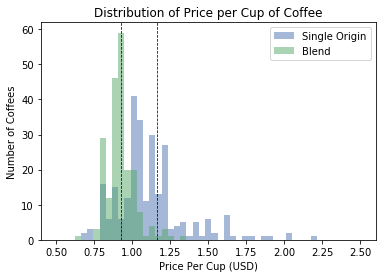

In [27]:
x = price_cup[price_cup['blend_single']=='Single Origins']['ppc']
y = price_cup[price_cup['blend_single']=='Blends']['ppc']

bins = np.linspace(0.5, 2.5, 50)
plt.style.use('seaborn-deep')

ppc_group = plt.figure()

plt.hist(x, bins, alpha=0.5, label='Single Origin')
plt.hist(y, bins, alpha=0.5, label='Blend')
plt.xlabel('Price Per Cup (USD)')
plt.ylabel('Number of Coffees')
plt.title('Distribution of Price per Cup of Coffee')
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=.75)
plt.axvline(y.mean(), color='k', linestyle='dashed', linewidth=.75)
plt.legend(loc='upper right')
plt.show()
ppc_group.savefig('ppc_group') #figure will be saved as saved_figure.png
ppc_group.savefig('ppc_group.pdf') #figure will be saved as saved_figure.pdf

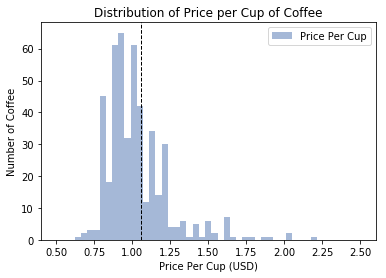

In [28]:
z = price_cup['ppc']

bins = np.linspace(0.5, 2.5, 50)
plt.style.use('seaborn-deep')
ppc_all = plt.figure()
plt.xlabel('Price Per Cup (USD)')
plt.ylabel('Number of Coffee')
plt.title('Distribution of Price per Cup of Coffee')
plt.hist(z, bins, alpha=0.5, label='Price Per Cup')
plt.axvline(z.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.show()
ppc_all.savefig('ppc_all') #figure will be saved as saved_figure.png
ppc_all.savefig('ppc_all.pdf') #figure will be saved as saved_figure.pdf

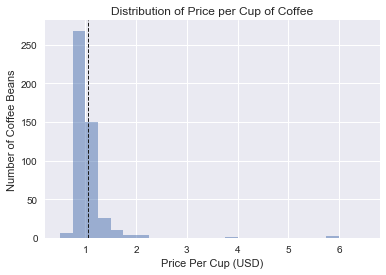

In [672]:
bins = np.linspace(0.5, 6.5, 25)
out = plt.figure()
plt.style.use('seaborn-deep')
plt.xlabel('Price Per Cup (USD)')
plt.ylabel('Number of Coffee Beans')
plt.title('Distribution of Price per Cup of Coffee')
plt.hist(z, bins, alpha=0.5, label='Price Per Cup')
plt.axvline(z.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()
out.savefig('outliers_ppc') #figure will be saved as saved_figure.png
out.savefig('outliers_ppc.pdf') #figure will be saved as saved_figure.pdf

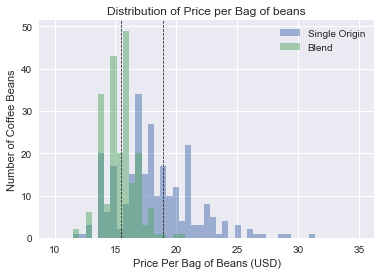

In [673]:
a = price_cup[price_cup['blend_single']=='Single Origins']['price']
b = price_cup[price_cup['blend_single']=='Blends']['price']

bins = np.linspace(10, 35, 50)

bag = plt.figure()
plt.style.use('seaborn-deep')
plt.xlabel('Price Per Bag of Beans (USD)')
plt.ylabel('Number of Coffee Beans')
plt.title('Distribution of Price per Bag of beans')
plt.hist(a, bins, alpha=0.5, label='Single Origin')
plt.hist(b, bins, alpha=0.5, label='Blend')
plt.axvline(a.mean(), color='k', linestyle='dashed', linewidth=.75)
plt.axvline(b.mean(), color='k', linestyle='dashed', linewidth=.75)
plt.legend(loc='upper right')
plt.show()
bag.savefig('bag') #figure will be saved as saved_figure.png
bag.savefig('bag.pdf') #figure will be saved as saved_figure.pdf

NameError: name 'a' is not defined

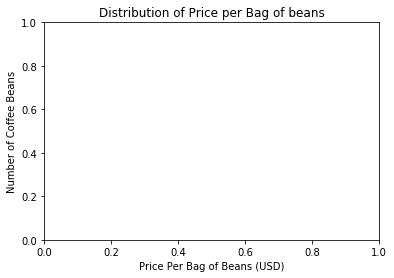

In [29]:
bins = np.linspace(10, 90, 30)

bout = plt.figure()
plt.style.use('seaborn-deep')
plt.xlabel('Price Per Bag of Beans (USD)')
plt.ylabel('Number of Coffee Beans')
plt.title('Distribution of Price per Bag of beans')
plt.hist(a, bins, alpha=0.5, label='Single Origin')
plt.hist(b, bins, alpha=0.5, label='Blend')
plt.axvline(a.mean(), color='k', linestyle='dashed', linewidth=.75)
plt.axvline(b.mean(), color='k', linestyle='dashed', linewidth=.75)
plt.legend(loc='upper right')
plt.show()
bout.savefig('bout') #figure will be saved as saved_figure.png
bout.savefig('bout.pdf') #figure will be saved as saved_figure.pdf

In [30]:
bc = df.groupby('blend_single')['classification'].value_counts()
bcdf = bc.to_frame()
bcdf_sing = df[df['blend_single'] == 'Single Origins']['classification'].value_counts()
bcdf_blend = df[df['blend_single'] == 'Blends']['classification'].value_counts()

In [31]:
sin = price_cup[price_cup['blend_single'] == 'Single Origins'].groupby('blend_single')['classification'].value_counts()
ble = price_cup[price_cup['blend_single'] == 'Blends'].groupby('blend_single')['classification'].value_counts()

In [32]:
ble

blend_single  classification   
Blends        Sweet & Smooth       49
              Balanced & Fruity    46
              Comforting & Rich    46
              Syrupy & Smooth      41
              Roasty & Smoky       14
              Deep & Rich           6
              Chocolaty & Sweet     3
              Crisp & Bright        3
              Sweet & Tart          1
Name: classification, dtype: int64

In [33]:
sing = [4,81,1,0,24,0,49,15,4,32,44,1,6,0]
blen = [49,3,46,14,0,46,1,0,41,0,0,6,0,3]

In [545]:
bcdf_sing = bcdf_sing.to_frame()
bcdf_blend = bcdf_blend.to_frame()

<Figure size 432x288 with 0 Axes>

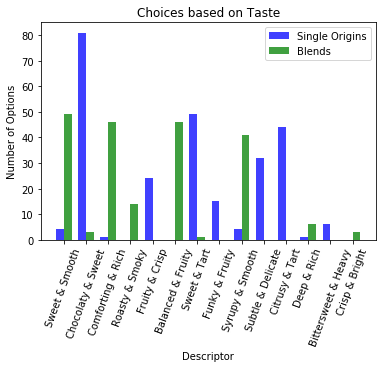

In [35]:
class_groups = ('Sweet & Smooth','Chocolaty & Sweet', 'Comforting & Rich', 'Roasty & Smoky',
                'Fruity & Crisp', 'Balanced & Fruity', 'Sweet & Tart', 'Funky & Fruity',
                'Syrupy & Smooth', 'Subtle & Delicate','Citrusy & Tart' ,'Deep & Rich', 
                'Bittersweet & Heavy', 'Crisp & Bright')

# create plot
classfig = plt.figure()
classfig, ax = plt.subplots()
index = np.arange(14)
bar_width = 0.35
opacity = 0.8
 
single = plt.bar(index, sing, bar_width,
                 alpha=0.75,
                 color='b',
                 label='Single Origins')
 
blends = plt.bar(index + bar_width, blen, bar_width,
                 alpha=0.75,
                 color='g',
                 label='Blends')

plt.xlabel('Descriptor')
plt.ylabel('Number of Options')
plt.title('Choices based on Taste')
plt.xticks(index + bar_width/2, class_groups, rotation = 70)
plt.legend()
plt.show()
classfig.savefig('class')
classfig.savefig('class.pdf')

In [701]:
bcdf['blend_single'][9:] = 'r'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0,0.5,'class')

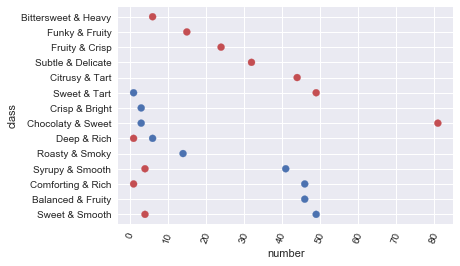

In [704]:
class_groups = ['Sweet & Smooth','Chocolaty & Sweet', 'Comforting & Rich', 'Roasty & Smoky',
                'Fruity & Crisp', 'Balanced & Fruity', 'Sweet & Tart', 'Funky & Fruity',
                'Syrupy & Smooth', 'Subtle & Delicate','Citrusy & Tart' ,'Deep & Rich', 
                'Bittersweet & Heavy', 'Crisp & Bright']
plt.scatter(bcdf['class'], bcdf['classification'], color=bcdf['blend_single'])
plt.xlabel('number')
plt.xticks(rotation=70)
plt.ylabel('class')

In [453]:
loc_roast = df.groupby('location')['roaster'].value_counts()
lr = loc_roast.to_frame()

In [454]:
lr

roaster
location             roaster                
Austin, TX           Cuvee                13
Bentonville, AR      Airship               9
Birmingham, AL       Revelator            11
Boston, MA           George Howell         8
Boulder, CO          Boxcar                6
Brooklyn, NY         Parlor                4
Chicago, IL          Intelligentsia       13
                     Metric               12
                     Passion House         8
Denver, CO           Novo                 12
                     Huckleberry           9
Fayetteville, AR     Onyx                 17
Grand Rapids, MI     Madcap               10
Ithaca, NY           Gimme!                9
Lancaster, PA        Passenger            28
Los Angeles, CA      Groundwork           13
Louisville, KY       Quills                9
Miami, FL            Panther              11
Milwaukee, WI        Anodyne               7
Minneapolis, MN      Dogwood               6
                     Spyhouse              6
Nelsonville, WI      Ruby                  8
New York, NY         Irving Farm          15
                     Joe                   5
Oakland, CA          Highwire              7
                     AKA                   4
                     Manufactory           2
Philadelphia, PA     La Colombe           20
                     ReAnimator            6
Portland, ME         Tandem                5
Portland, OR         Stumptown             9
                     Sterling              6
Post Falls, ID       DOMA                 16
Rancho Cucamonga, CA Klatch               13
Redlands, CA         Augie's               3
Sacramento, CA       Temple               14
Salem, MA            Atomic               13
San Antonio, TX      Merit                 4
San Diego, CA        Bird Rock             1
San Francisco, CA    Sightglass            8
                     Ritual                7
San Rafael, CA       Equator               7
Santa Barbara, CA    Dune                  7
Santa Cruz, CA       Verve                15
Seattle, WA          Caffe Vita           11
                     Elm                   7
                     Kuma                  7
St. Louis, MO        Blueprint             5
Topeka, KS           PT's                  9
Viroqua, WI          Kickapoo             11
West Chester, PA     Maquina               4

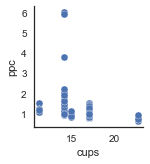

In [530]:
sns.set(style='white')
sns.pairplot(x_vars='cups', y_vars='ppc', data=price_cup)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



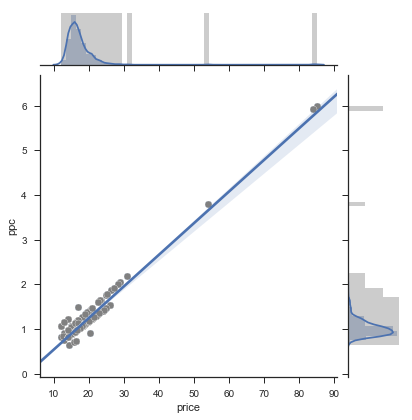

In [528]:
sns.set(style="ticks", color_codes=True)

g = sns.JointGrid(x='price', y='ppc', data=price_cup)
g = g.plot(sns.regplot, sns.distplot)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")

### Getting coordinates of cities

In [131]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='tinyboxes')

In [132]:
location = geolocator.geocode('Brooklyn, NY')
location

Location(BK, Kings County, NYC, New York, 11226, USA, (40.6501038, -73.9495823, 0.0))

In [136]:
location[1]

(40.6501038, -73.9495823)

In [237]:
lis = list(map(lambda x: geolocator.geocode(x), cities))

In [240]:
lis

[Location(NYC, New York, USA, (40.7308619, -73.9871558, 0.0)),
 Location(Denver, Denver County, Colorado, USA, (39.7391428, -104.984696, 0.0)),
 Location(Topeka, Shawnee County, Kansas, USA, (39.049011, -95.677556, 0.0)),
 Location(Louisville, Jefferson County, Kentucky, USA, (38.2542376, -85.759407, 0.0)),
 Location(Post Falls, Kootenai County, Idaho, 83854, USA, (47.7110106, -116.9480877, 0.0)),
 Location(Philadelphia, Philadelphia County, Pennsylvania, USA, (39.9524152, -75.1635755, 0.0)),
 Location(Seattle, King County, Washington, USA, (47.6038321, -122.3300624, 0.0)),
 Location(West Chester, Chester County, Pennsylvania, USA, (39.9597213, -75.6059638, 0.0)),
 Location(Minneapolis, Hennepin County, Minnesota, USA, (44.9772995, -93.2654692, 0.0)),
 Location(Lancaster, Lancaster County, Pennsylvania, 17604, USA, (40.03813, -76.3056686, 0.0)),
 Location(Portland, Multnomah County, Oregon, USA, (45.5202471, -122.6741949, 0.0)),
 Location(Fayetteville, Washington County, Arkansas, USA,

In [281]:
cit = pd.DataFrame(cities)
cit.columns = ['City State']
cit

,City State
0,"New York, NY"
1,"Denver, CO"
2,"Topeka, KS"
3,"Louisville, KY"
4,"Post Falls, ID"
5,"Philadelphia, PA"
6,"Seattle, WA"
7,"West Chester, PA"
8,"Minneapolis, MN"
9,"Lancaster, PA"


In [262]:
coordinates = ['40.7308619, -73.9871558',
       '39.7391428, -104.984696',
       '39.049011, -95.677556',
       '38.2542376, -85.759407',
       '47.7110106, -116.9480877',
       '39.9524152, -75.1635755',
       '47.6038321, -122.3300624',
       '39.9597213, -75.6059638',
       '44.9772995, -93.2654692',
       '40.03813, -76.3056686',
       '45.5202471, -122.6741949',
       '36.0625843, -94.1574328',
       '25.7742658, -80.1936589',
       '34.4221319, -119.7026673',
       '41.8755616, -87.6244212',
       '34.1033192, -117.5751735',
       '37.9735346, -122.5310874',
       '42.3602534, -71.0582912',
       '36.3728538, -94.2088172',
       '40.0149856, -105.2705456',
       '42.9632405, -85.6678639',
       '42.4396039, -76.4968019',
       '40.6501038, -73.9495823',
       '37.8044557, -122.2713563',
       '30.2711286, -97.7436995',
       '36.974201, -122.0297182',
       '43.5569174, -90.8887413',
       '33.5206824, -86.8024326',
       '44.4949737, -89.3098355',
       '42.5195292, -70.8967226',
       '37.7792808, -122.4192363',
       '34.0536834, -118.2427669',
       '43.6610277, -70.2548596',
       '34.0767295, -117.125110270183',
       '32.7174209, -117.1627714',
       '43.0349931, -87.922497',
       '38.6272733, -90.1978889',
        '38.5815719, -121.4943996',
       '29.4246002, -98.4951405']
 

In [263]:
cit['long lat'] = coordinates

In [264]:
cit
# add coordinate data to city data frame

,City State,long lat
0,"New York, NY","40.7308619, -73.9871558"
1,"Denver, CO","39.7391428, -104.984696"
2,"Topeka, KS","39.049011, -95.677556"
3,"Louisville, KY","38.2542376, -85.759407"
4,"Post Falls, ID","47.7110106, -116.9480877"
5,"Philadelphia, PA","39.9524152, -75.1635755"
6,"Seattle, WA","47.6038321, -122.3300624"
7,"West Chester, PA","39.9597213, -75.6059638"
8,"Minneapolis, MN","44.9772995, -93.2654692"
9,"Lancaster, PA","40.03813, -76.3056686"


In [261]:
geolocator.geocode('Santa Barbara, CA, USA')

Location(Santa Barbara, Santa Barbara County, California, USA, (34.4221319, -119.7026673, 0.0))

In [317]:
# seperate the coordinate data for use in plotting

regex = r'(?P<long>[^,]+)\s*,\s*\-+(?P<lat>[^\s]+)'
l = cit['long lat'].str.extract(regex)

KeyError: 'long lat'

In [319]:
city_coords = pd.merge(cit, l, on=l.index)

In [318]:
l.columns = ['latitude', 'longitude']

In [320]:
city_coords = city_coords[['City State', 'latitude', 'longitude']]

In [326]:
city_coords[['latitude', 'longitude']] = city_coords[['latitude', 'longitude']].apply(pd.to_numeric)

In [327]:
city_coords.dtypes

City State     object
latitude      float64
longitude     float64
dtype: object

In [328]:
city_coords.longitude = city_coords.longitude*-1

In [366]:
city_coords.columns = ['location', 'latitude', 'longitude']

In [367]:
city_coords

,location,latitude,longitude
0,"New York, NY",40.730862,-73.987156
1,"Denver, CO",39.739143,-104.984696
2,"Topeka, KS",39.049011,-95.677556
3,"Louisville, KY",38.254238,-85.759407
4,"Post Falls, ID",47.711011,-116.948088
5,"Philadelphia, PA",39.952415,-75.163576
6,"Seattle, WA",47.603832,-122.330062
7,"West Chester, PA",39.959721,-75.605964
8,"Minneapolis, MN",44.977300,-93.265469
9,"Lancaster, PA",40.038130,-76.305669


In [378]:
merged = pd.merge(lr, city_coords, on = 'location')

In [395]:
x = merged['longitude']
y = merged['latitude']
s = merged['roaster']

In [379]:
merged[:5]

,location,roaster,latitude,longitude
0,"Austin, TX",13,30.271129,-97.743700
1,"Bentonville, AR",9,36.372854,-94.208817
2,"Birmingham, AL",11,33.520682,-86.802433
3,"Boston, MA",8,42.360253,-71.058291
4,"Boulder, CO",6,40.014986,-105.270546


In [403]:
!pip install Basemap

In [412]:
# Get the location of each city and plot it
from scipy.misc import imread

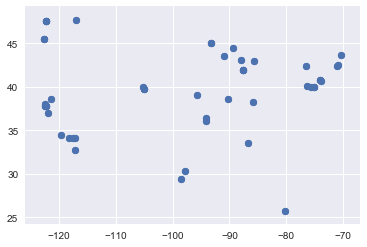

In [556]:
x = merged['longitude']
y = merged['latitude']
s = merged['roaster']

plt.plot(x,y,'bo')
plt.scatter(x, y)
plt.show()

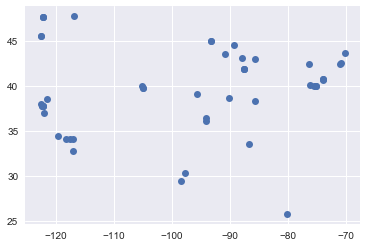

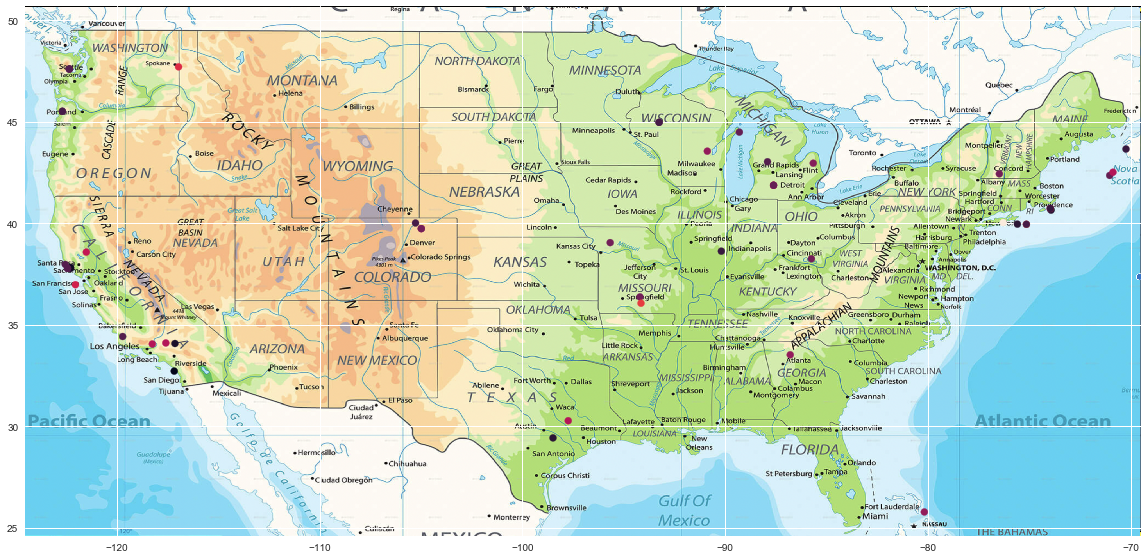

In [592]:
plt.plot(x,y,'bo')
f, ax = plt.subplots(figsize=(20,20))
plt.scatter(x, y, c=s)

img = plt.imread('map.png')
plt.imshow(img, zorder=0, extent=[-124.5,-69.5,24.6,50.7])
plt.show()

